# Función para Spectral Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import cv2



# Función de Spectral clustering
def SpecClus(datos, K):
    # Calculamos la matriz de similitud con el kernel gaussioano
    m = datos.shape[0]
    sigma = np.var(datos)
    W = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            W[i][j] =  np.exp(-np.linalg.norm(datos[i] - datos[j])**2 / (2*sigma**2))

    # Calculamos la matriz diagonal D
    D = np.zeros((m, m))
    for i in range(m):
        suma = np.sum(W[i])
        D[i][i] = suma

    # Calculamos la matriz Laplaciana L
    L = D - W
    L_n = L / np.linalg.norm(L, axis=1)[:, np.newaxis]


    # Sacamos los eigenvectores de L
    eigenvalores, eigenvectores = np.linalg.eig(L_n)

    indices_eigenvalores_distintos_cero = np.where(np.abs(eigenvalores) > 1e-3)[0]

    # Selecciona los primeros k eigenvectores correspondientes a los eigenvalores distintos de cero
    k = len(indices_eigenvalores_distintos_cero)  # Puedes ajustar k según tus necesidades
    U = eigenvectores[:, indices_eigenvalores_distintos_cero]

     # Clasificar con k-means
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(U)
    labels = kmeans.labels_

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    return labels,  centroids


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(X, labels):
    # Crear una lista de colores únicos para asignar a cada cluster
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    colors = plt.cm.get_cmap('tab20', n_clusters)

    # Crear una figura
    plt.figure(figsize=(8, 8))

    # Iterar a través de cada cluster y plotear los puntos correspondientes
    for cluster_label in unique_labels:
        cluster_data = X[labels == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors(cluster_label), label=f'Cluster {cluster_label}')

    # Configurar etiquetas y título
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gráfico de Clusters')

    # Agregar una leyenda
    #plt.legend()

    # Mostrar el gráfico
    plt.show()


# Clasificación de puntos

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_swiss_roll

# Datos sinteticos
X1, _ = make_blobs(n_samples=10000, centers=40, random_state=0)
X2, _ = make_moons(n_samples=2000, noise=0.05, random_state=0)
np.random.seed(7)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X3 = np.concatenate((x1,x2,x3),axis=0)
X4, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)


In [ ]:
# K-means para cada conjunto de datos
K = 40
clustersX1, centrosX1 = SpecClus(X1, K)
plot_clusters(X1, clustersX1 )

KeyboardInterrupt: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-6434b3f2bc4f>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_clusters)
<ipython-input-4-6434b3f2bc4f>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors(cluster_label), label=f'Cluster {cluster

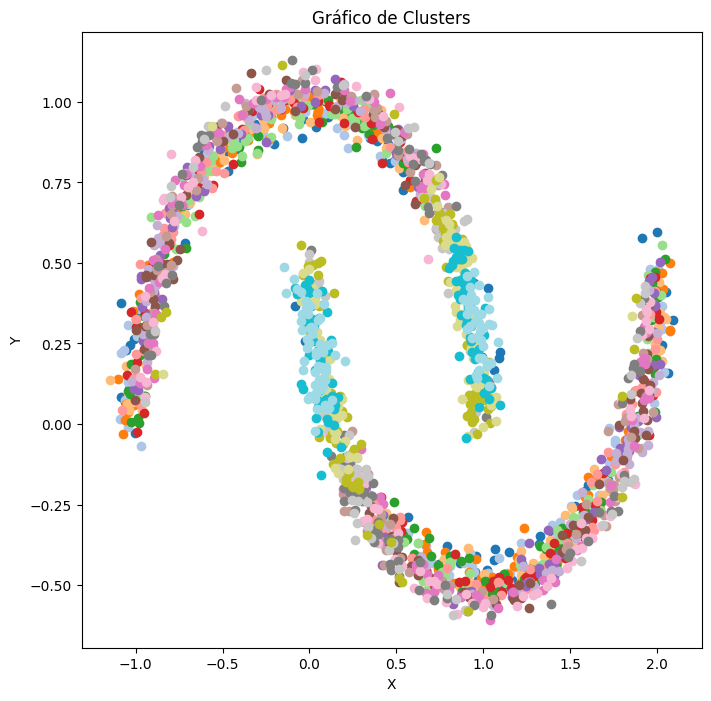

In [ ]:
clustersX2, centrosX2 = SpecClus(X2, 2)
plot_clusters(X2, clustersX2)


(300, 300)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-8927826ceafa>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_clusters)
<ipython-input-8-8927826ceafa>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors(cluster_label), label=f'Cluster {cluster

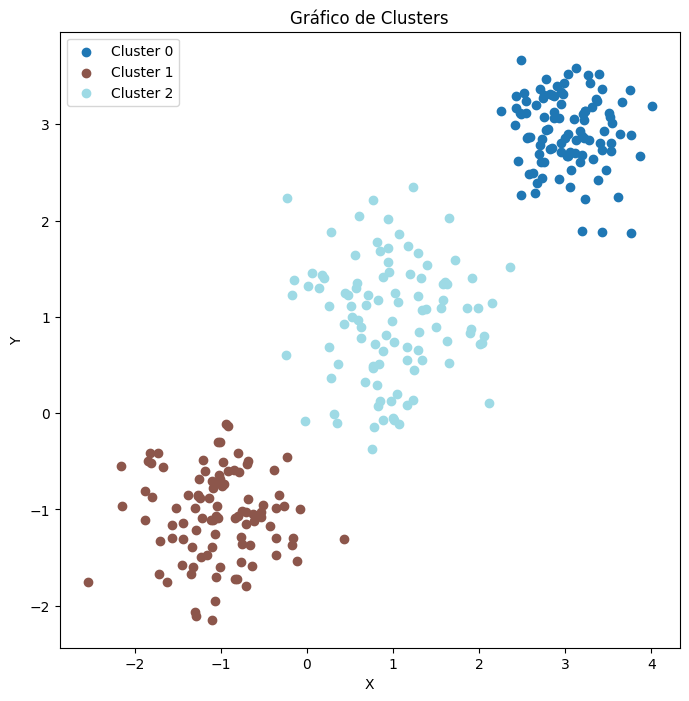

In [ ]:
clustersX3, centrosX3 = SpecClus(X3, 3)
plot_clusters(X3, clustersX3 )

(300, 300)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-8927826ceafa>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_clusters)
<ipython-input-16-8927826ceafa>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors(cluster_label), label=f'Cluster {clust

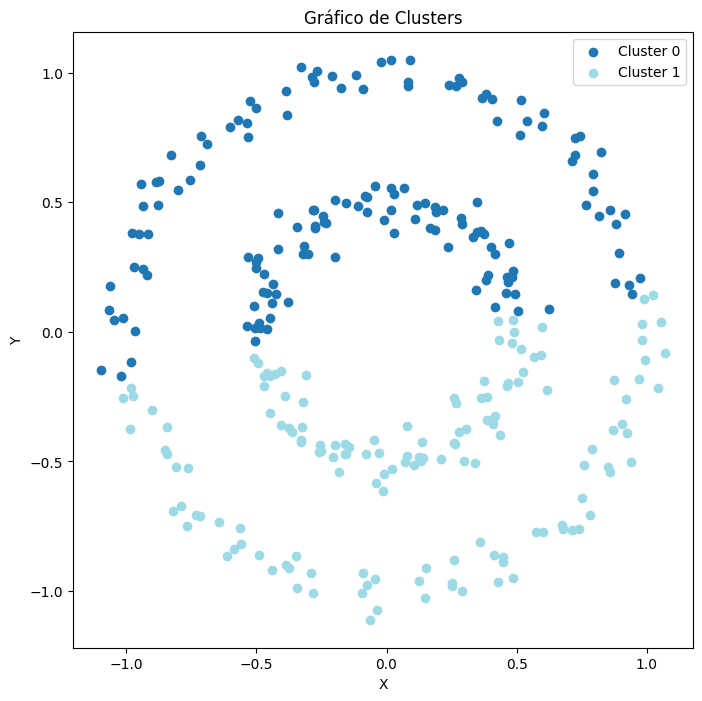

In [ ]:
clustersX4, centrosX4 = SpecClus(X4, 2)
plot_clusters(X4, clustersX4)

# Clasificación de números

In [ ]:
# Cargamos los datos
from sklearn.datasets import load_digits
import cv2
from google.colab.patches import cv2_imshow

np.random.seed(1)
digits = load_digits()
data = digits.data
data = 255-data

In [ ]:
centros_dig, clusters_dig = SpecClus(data, 10)

In [ ]:
import matplotlib.pyplot as plt
# Inicializa el arreglo de etiquetas Z
Z = np.empty(data.shape[0], dtype=int)

for j in range(data.shape[0]):
    for l in range(10):
        if any(np.array_equal(data[j], punto) for punto in clusters_dig[l]):
            Z[j] = l
            break

# Ahora que tienes las etiquetas Z, puedes visualizar los clústeres
n_clusters = 10  # Número de clústeres

for i in range(n_clusters):
    fila = np.where(Z == i)[0]  # Filas en Z donde están las imágenes de cada clúster
    num = fila.shape[0]  # Número de imágenes en cada clúster
    r = int(np.floor(num / 10.))  # Convertir r a entero

    print("Clúster " + str(i))
    print(str(num) + " elementos")

    plt.figure(figsize=(10, 10))
    for k in range(0, num):
        plt.subplot(r + 1, 10, k + 1)
        imagen = data[fila[k]].reshape(8, 8)  # Reshape de la imagen
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()


# Reducción de tamaño

In [ ]:
# Cargamos la imagen
# Especifica la ruta de la imagen que deseas leer
ruta_imagen = 'holi.jpg'

# Utiliza la función cv2.imread() para cargar la imagen
imagen = cv2.imread(ruta_imagen)


# Obtener las dimensiones de la imagen
h, w, _ = imagen.shape

# Preparar los datos para K-Means
B = imagen[:, :, 0].reshape(-1, 1)
G = imagen[:, :, 1].reshape(-1, 1)
R = imagen[:, :, 2].reshape(-1, 1)
X = np.concatenate((R, G, B), axis=1)

# Imprimir el número de píxeles
num_pixels = w * h
print('Número de pixels  =', num_pixels)

In [ ]:
# Aplicamos spectral clustering
K = 30
centros, cluster = SpecClus(X, K)

In [ ]:
# Recuperamos la nueva imagen
for j in range(K):
  # Valor p
  p = centros[j]

  # Crear una matriz resultante que tenga la misma forma que B
  resultante = np.copy(X)
  lista = cluster[j]

  # Iterar a través de los elementos de A
  for i in range(len(lista)):
      elemento_A = lista[i]

      # Verificar si el elemento de A está en B
      coincidencias = np.all(X == elemento_A, axis=1)

      if np.any(coincidencias):
          # Obtener los índices de las coincidencias
          indices_coincidencias = np.where(coincidencias)[0]

          # Reemplazar los elementos en B por p
          for idx in indices_coincidencias:
              resultante[idx, :] = p
  X = np.copy(resultante)
# Crear un objeto de imagen RGB vacío con las dimensiones deseadas
imagen = Image.new("RGB", (w, h))

# Llenar la imagen con los píxeles de la matriz
imagen_array = np.array(imagen)
for fila in range(min(w * h, len(X))):
    pixel = tuple(X[fila])
    x, y = fila % w, fila // w
    imagen_array[y, x] = pixel

# Crear una imagen PIL a partir del arreglo de píxeles
imagen = Image.fromarray(imagen_array, "RGB")

# Mostrar la imagen o guardarla en un archivo
imagen.show()
imagen.save("reducido.png")

# Segmentacion de imagenes

In [ ]:
# Cargamos la imagen y la convertimos BN
I = Image.open("Cerebro.jpeg")
I1 = I.convert('L')
I2 = np.asarray(I1,dtype=np.float)
h, w = I.size
# La convertimos para ponerla en la funcion k-means
X = I2.reshape((-1, 1))

<ipython-input-3-38c6495573e2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I2 = np.asarray(I1,dtype=np.float)


In [ ]:
# Aplicamos sc
K = 3
cluster,centros = SpecClus(X, K)

In [ ]:
# Recuperamos la nueva imagen
for j in range(K):
  # Valor p
  p = centros[j]

  # Crear una matriz resultante que tenga la misma forma que B
  resultante = np.copy(X)
  lista = cluster[j]

  # Iterar a través de los elementos de A
  for i in range(len(lista)):
      elemento_A = lista[i]

      # Verificar si el elemento de A está en B
      coincidencias = np.all(X == elemento_A, axis=1)

      if np.any(coincidencias):
          # Obtener los índices de las coincidencias
          indices_coincidencias = np.where(coincidencias)[0]

          # Reemplazar los elementos en B por p
          for idx in indices_coincidencias:
              resultante[idx, :] = p
  X = np.copy(resultante)
# Crear un objeto de imagen RGB vacío con las dimensiones deseadas
imagen = Image.new("RGB", (w, h))

# Llenar la imagen con los píxeles de la matriz
imagen_array = np.array(imagen)
for fila in range(min(w * h, len(X))):
    pixel = tuple(X[fila])
    x, y = fila % w, fila // w
    imagen_array[y, x] = pixel

# Crear una imagen PIL a partir del arreglo de píxeles
imagen = Image.fromarray(imagen_array, "RGB")

# Mostrar la imagen o guardarla en un archivo
imagen.show()
imagen.save("Cerebro_segmentado.png")